In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder

In [36]:
ads = pd.read_csv("Log_regression.csv")

In [37]:
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [38]:
ads.shape

(400, 5)

In [45]:
X = ads.iloc[:,0:4].values
X

array([[15624510, 'Male', 19, 19000],
       [15810944, 'Male', 35, 20000],
       [15668575, 'Female', 26, 43000],
       ...,
       [15654296, 'Female', 50, 20000],
       [15755018, 'Male', 36, 33000],
       [15594041, 'Female', 49, 36000]], dtype=object)

In [47]:
labelEncoder_X = LabelEncoder()
X[:,1] = labelEncoder_X.fit_transform(X[:,1])
X

array([[15624510, 1, 19, 19000],
       [15810944, 1, 35, 20000],
       [15668575, 0, 26, 43000],
       ...,
       [15654296, 0, 50, 20000],
       [15755018, 1, 36, 33000],
       [15594041, 0, 49, 36000]], dtype=object)

In [48]:
y = ads.iloc[:,4].values
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [50]:
logref = LogisticRegression()

In [51]:
X_train

array([[15810075, 0, 44, 39000],
       [15583681, 1, 32, 120000],
       [15733964, 0, 38, 50000],
       ...,
       [15591433, 1, 36, 52000],
       [15776348, 0, 27, 54000],
       [15794661, 0, 26, 118000]], dtype=object)

In [52]:
logref.fit(X_train,y_train)

LogisticRegression()

In [54]:
y_pred = logref.predict(X_test)

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.81
Precision: 0.8823529411764706
Recall: 0.46875


In [57]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat

array([[66,  2],
       [17, 15]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

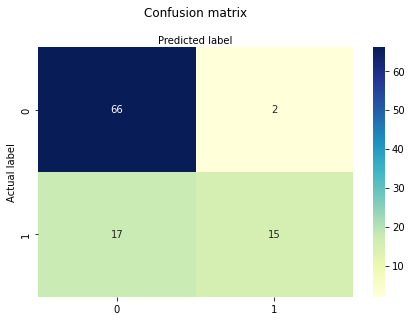

In [60]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu", fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')